In [1]:
# Al invocar la funcion fetch_housing_data() se crea el directorio datasets/housing 
# se descarga y descomprime el archivo housing.tgz localmente como housing.csv

# Inhabilito este codigo ya que lo ejecute por primera vez y ya se descargo el archivo en la maquina,
# adicionalmente al ejecutar el codigo sin contar con internet me genera error por timeout

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
'''

# Obtener la data de internet - Tal lo indicado en el libro
"""
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Invocar la funcion para descargar y descomprimir la data localmente
fetch_housing_data()

# Construyo Funcion para abrir el dataset ubicado en una carpeta diferente a donde esta el .py
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Invoco la funcion para abrir el dataset
housing = load_housing_data()
"""

# Abro el dataset cuando está ubicado en la misma carpeta del .py
housing = pd.read_csv("housing.csv")


In [2]:

housing.head() # Top five rows in the dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:

housing.info() # Description of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Categories related to column ocean_proximity - its maybe a Categorical attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


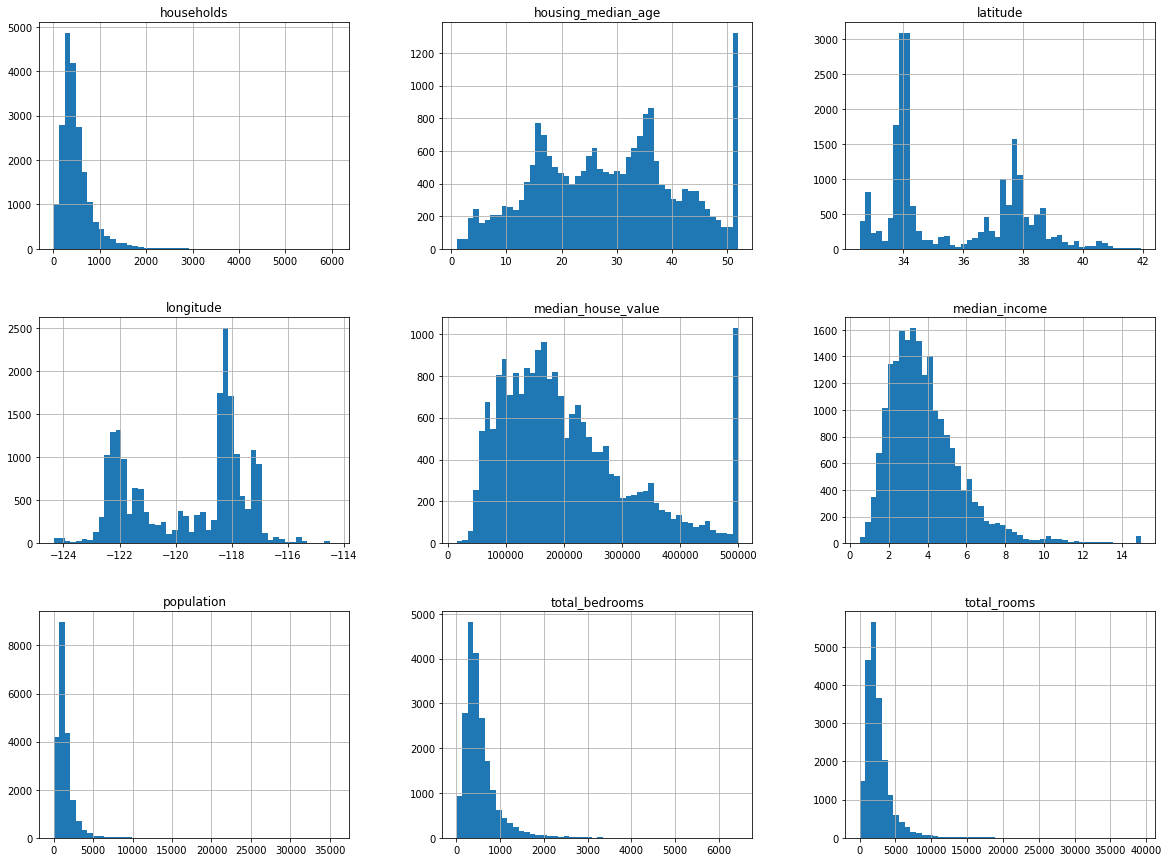

In [6]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
# Creating a Test Set
# Creando el Test Set: 
# Separando 20% de la data para Test - con random y split_train_test()
# La desventaja de utilizar este random es que cada vez que ejecute el modelo
# me arroja diferentes Set Test y por lo tanto el Train Set tambien es diferente
# esto conlleva a que de alguna manera se usa toda o buena parte de la data en
# el entrenamiento del modelo, lo cual no es bueno.

#import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    print("test_set_size: ", test_set_size)        
    test_indices = shuffled_indices[:test_set_size]
    print("test indices: ", test_indices)    
    train_indices = shuffled_indices[test_set_size:]
    print("train indices: ", train_indices)    
    return data.iloc[train_indices], data.iloc[test_indices]

# iloc: seleccion con indices numericos, por posicion
# loc: seleccion con labels, etiqueta

train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set), "train data +", len(test_set), "test data")

# Esta no es la forma correcta de determinar train y test sets
# ya que al actualizar el dataset se estaria mezclando data
# de train y de test, es decir, no se respetaria su clasificacion
# inicial


test_set_size:  4128
test indices:  [18047 12448  6172 ... 18516 16243  8606]
train indices:  [  942  5207 17338 ...  7123   817 15512]
16512 train data + 4128 test data


In [8]:
# Crear un Test Set utilizando Hash en un identificador unico de cada instancia del dataset
# Para el caso del dataset housing no se tiene una columna con identificador unico para cada instancia 
# Por lo que puede usarse el row index como el identificador - ID
# Otra opcion seria utilizar el feature mas estable como identificador unico (ej. las coordenadas)
# esto en caso de no poder garantizar que no se eliminen registros del dataset original o de 
# poder incluir nueva data al dataset al final de este 

'''
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # Adiciona una columna 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y
# las nuevas adiciones al dataset deben realizarse al final del dataset original.  
'''


'\nimport hashlib\n\ndef test_set_check(identifier, test_ratio, hash):\n    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio\n\ndef split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n\nhousing_with_id = housing.reset_index() # Adiciona una columna \'index\'\ntrain_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")\n\n# Utilizando la nueva columna index, no puedo eliminar registros del dataset original, y\n# las nuevas adiciones al dataset deben realizarse al final del dataset original.  \n'

In [9]:
# Seleccion Random
# Como la data siempre va a ser la misma (no cambia ni se incrementa o disminuye) usamos la funcion
# train_test_split para usar seed o random state garantizando que siempre genere los mismos indices

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")




16512 Train Set data + 4128 Test Set data


In [29]:
# Dado que el atributo "median income" es importante para predecir el "median housing prices"
# y para evitar sesgos en la informacion, para garantizar que el "test set" sea representativo
# de las varias categorias de ingresos en el dataset, creamos un atributo categorico para el income
# dado que este es un valor continuo
# divido el "median_income" por 1.5 para limitar las categorias y las categorias cuyo valor sea


housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)



"""
Where Parameters
----------
cond : boolean NDFrame, array-like, or callable
    Where `cond` is True, keep the original value. Where
    False, replace with corresponding value from `other`.
    If `cond` is callable, it is computed on the NDFrame and
    should return boolean NDFrame or array. The callable must
    not change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as cond.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
other : scalar, NDFrame, or callable
    Entries where `cond` is False are replaced with
    corresponding value from `other`.\n\n
    If other is callable, it is computed on the NDFrame and
    should return scalar or NDFrame. The callable must not
    change input NDFrame (though pandas doesn't check it).

    .. versionadded:: 0.18.1
        A callable can be used as other.

inplace : boolean, default False
    Whether to perform the operation in place on the data
axis : alignment axis if needed, default None
level : alignment level if needed, default None
errors : str, {'raise', 'ignore'}, default 'raise'
    - ``raise`` : allow exceptions to be raised
    - ``ignore`` : suppress exceptions. On error return original object

    Note that currently this parameter won't affect
    the results and will always coerce to a suitable dtype.

try_cast : boolean, default False
    try to cast the result back to the input type (if possible),
raise_on_error : boolean, default True
    Whether to raise on invalid data types (e.g. trying to where on
    strings)

    .. deprecated:: 0.21.0from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")
    
    
    
    
When inplace=True is passed, the data is renamed in place (it returns nothing), so you'd use:
df.an_operation(inplace=True)

When inplace=False is passed (this is the default value, so isn't necessary), 
performs the operation and returns a copy of the object
"""

'\nWhere Parameters\n----------\ncond : boolean NDFrame, array-like, or callable\n    Where `cond` is True, keep the original value. Where\n    False, replace with corresponding value from `other`.\n    If `cond` is callable, it is computed on the NDFrame and\n    should return boolean NDFrame or array. The callable must\n    not change input NDFrame (though pandas doesn\'t check it).\n\n    .. versionadded:: 0.18.1\n        A callable can be used as cond.\nfrom sklearn.model_selection import train_test_split\n\ntrain_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)\n\nprint(len(train_set), "Train Set data +", len(test_set), "Test Set data")\nother : scalar, NDFrame, or callable\n    Entries where `cond` is False are replaced with\n    corresponding value from `other`.\n\n\n    If other is callable, it is computed on the NDFrame and\n    should return scalar or NDFrame. The callable must not\n    change input NDFrame (though pandas doesn\'t check it).\n\n  

In [30]:
housing["income_cat"].value_counts()

3.0    5789
2.0    5265
4.0    2911
5.0    1889
1.0     658
Name: income_cat, dtype: int64

In [31]:
# Seleccion con Stratified Sampling de acuerdo con la nueva categoria "income_cat"

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print ("Categorias Unicas de income_cat en el train set: ", strat_train_set.income_cat.unique())
    
print ("Tamaño strat_train_set", len(strat_train_set))plt.figure(figsize = (10,8))
sns.boxplot(x = strat_train_set.median_income, y = strat_train_set.median_house_value)
print ("Tamaño strat_test_set", len(strat_test_set))
#print (strat_train_set)

#Proporcion de la categoria "income_cat" en el test_set
print("Proporcion con Sampling de la categoria income_cat en el test_set:\n\n", 
      (strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100))


Categorias Unicas de income_cat en el train set:  [ 5.  3. nan  4.  2.  1.]
Tamaño strat_train_set 13209
Tamaño strat_test_set 3303
Proporcion con Sampling de la categoria income_cat en el test_set:

 3.0    27.974569
2.0    26.339691
4.0    12.201029
5.0     8.961550
1.0     3.542234
Name: income_cat, dtype: float64


/home/dlav/ML/env/lib/python3.4/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/home/dlav/ML/env/lib/python3.4/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


In [32]:
# De acuerdo con Seleccion Random

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

print(len(train_set), "Train Set data +", len(test_set), "Test Set data")


#Proporcion de la categoria "income_cat" en el test_set con seleccion de datos aleatoria
print("Proporcion RANDOM de la categoria income_cat en el test_set:\n\n", (test_set["income_cat"].value_counts() / len(strat_test_set) * 100))



13209 Train Set data + 3303 Test Set data
Proporcion RANDOM de la categoria income_cat en el test_set:

 3.0    35.634272
2.0    31.516803
4.0    17.499243
5.0    11.444142
1.0     3.905540
Name: income_cat, dtype: float64


In [33]:
#Proporcion de la categoria "income_cat" en el dataset completo

print ("Proporcion la categoria income_cat en el dataset completo:\n\n", (housing["income_cat"].value_counts() / len(housing)*100))


Proporcion la categoria income_cat en el dataset completo:

 3.0    35.059351
2.0    31.885901
4.0    17.629603
5.0    11.440165
1.0     3.984981
Name: income_cat, dtype: float64


In [34]:
#housing.head() # Top five rows in the dataframe

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12620,-121.53,38.50,17.0,3087.0,477.0,1365.0,495.0,6.4667,216800.0,INLAND,5.0
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,221500.0,<1H OCEAN,3.0
7850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10381,-117.63,33.63,6.0,3068.0,549.0,985.0,536.0,4.2009,238000.0,<1H OCEAN,3.0
1401,-122.07,37.95,39.0,2199.0,388.0,1025.0,385.0,4.5893,190000.0,NEAR BAY,4.0


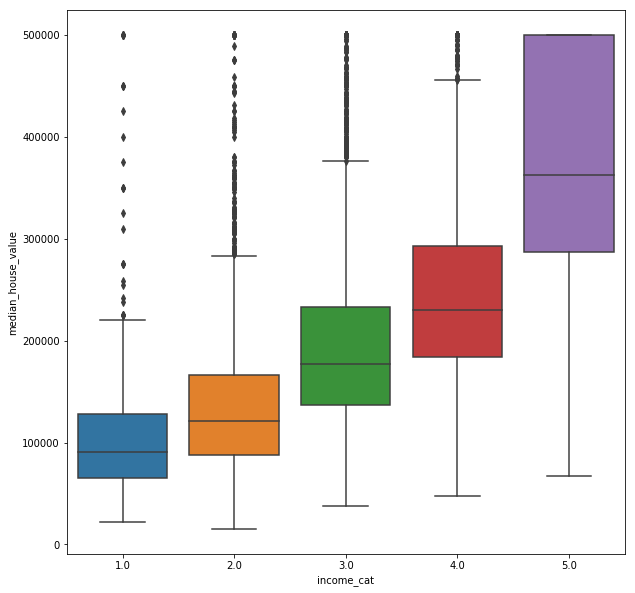

In [36]:
plt.figure(figsize = (10,10))
sns.boxplot(x = strat_train_set.income_cat, y = strat_train_set.median_house_value)

/home/dlav/ML/env/lib/python3.4/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/dlav/ML/env/lib/python3.4/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/dlav/ML/env/lib/python3.4/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

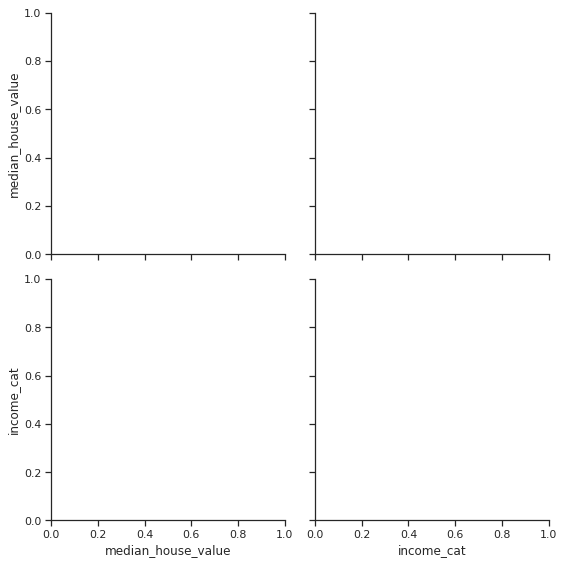

In [42]:
cols = ['median_house_value', 'income_cat']
sns.set(style = 'ticks')
sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')

In [16]:
# Removemos el atributo income_cat de strat_train_set y de strat_test_set para dejar el dataset
# en su estado original

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True) # drop values from column income_cat
    
# axis = 1: Recorre verticalmente por columnas (izquierda a derecha) ???
# axis = 0: Recorre horizontalmente por filas (arriba hacia abajo) ???
       

In [17]:
# housing.head() # Top five rows in the dataframe
# strat_train_set.head()

In [18]:
# Creo copia del training set para no dañar el original.Lo llamo housing
housing = strat_train_set.copy()

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


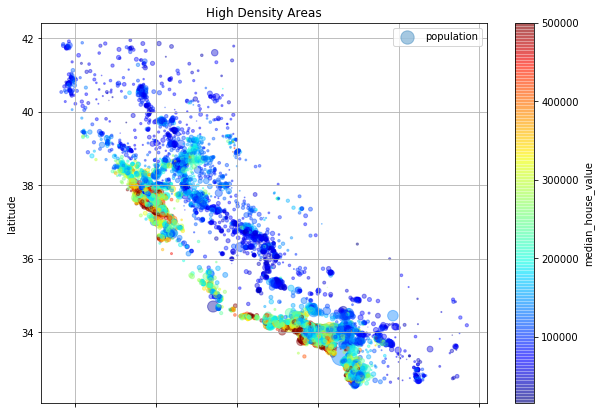

In [20]:
# Dado que tenemos informacion geografica (latitud y longitud) creamos un scatterplot
# de la copia de strat_train_set y que llamé housing

#housing.plot(kind = "scatter", x = "longitude", y = "latitude")
"""housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High density areas", grid = True, 
             alpha = "0.1") """

housing.plot(kind = "scatter", x = "longitude", y = "latitude", title = "High Density Areas", grid = True, 
             alpha = 0.4, s = housing["population"]/100, label = "population", figsize = (10,7), 
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

# El radio de cada circulo representa la poblacion de cada distrito (opcion s)
# El color representa el precio (opcion c)
# color map predefinido (opcion cmap) llamado jet, que va de azul a rojo

In [21]:
# Determino correlaciones
# Con el coeficiente de correlacion estandar (Pearsons r) entre cada par de atributos
# respecto al atributo median_house_value

corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)



median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [22]:
train_corr = strat_train_set.select_dtypes(include = [np.number])

train_corr.shape


(16512, 9)

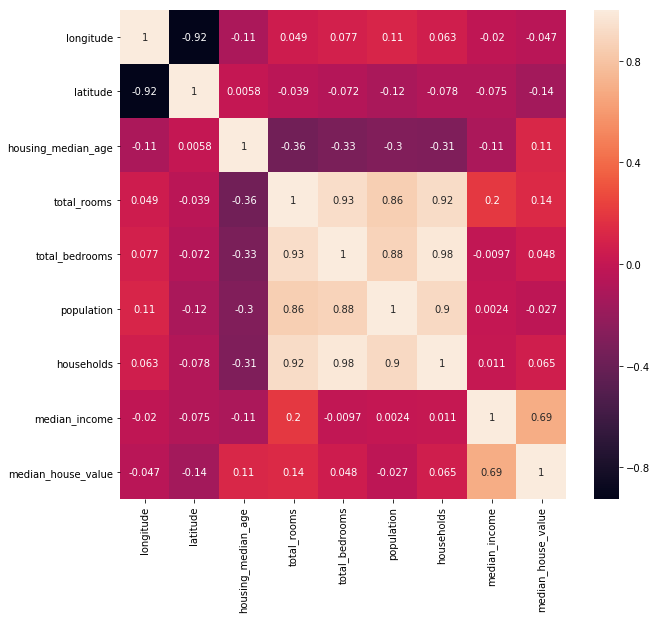

In [23]:
# Correlacion entre todos los atributos

correlation = train_corr.corr()
plt.subplots(figsize = (10,9))
sns.heatmap(correlation, annot = True)
#plt.show()

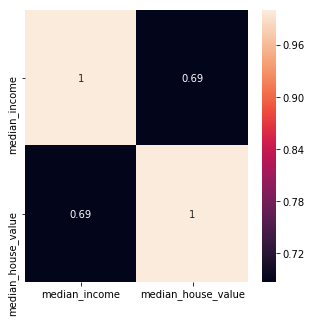

In [24]:
# Correlacion respecto al atributo principal y con correlacion superior a 0.5

top_feature = correlation.index[abs(correlation['median_house_value'] > 0.5)]
plt.subplots(figsize = (5,5))
top_corr = train_corr[top_feature].corr()
sns.heatmap(top_corr, annot = True)
plt.show()



In [37]:
#


/home/dlav/ML/env/lib/python3.4/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/dlav/ML/env/lib/python3.4/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/dlav/ML/env/lib/python3.4/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

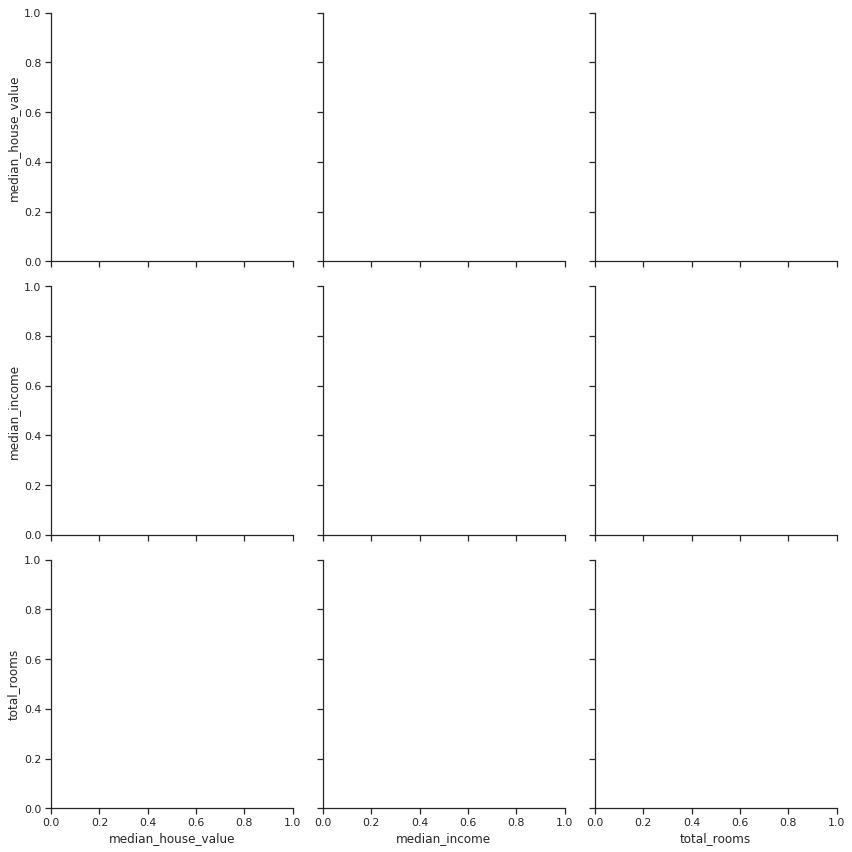

In [40]:
cols = ['median_house_value', 'income_cat', 'total_rooms']
sns.set(style = 'ticks')
sns.pairplot(strat_train_set[cols], size = 4, kind = 'reg')
